# Quantum Mechanics Review

This lab excercise has two goals:
* To review the basic principles of quantum mechanics.
* To practice some major functionalities of the python libraries matplotlib, numpy, scipy, and sympy.

To achieve these goals, we will practice on two quantum mechanical models: The particle in a 1D box, and the hydrogen atom.

## The Particle in a Box Model
In the particle in a box model, the potential is given by:
\begin{align}
V(x)&= 0, \quad \textrm{if } 0 \ge x \ge a \\
V(x)&= \infty, \quad 0 \quad \textrm{otherwise} \\
\end{align}

Solving the Scrhodinger's equation 
\begin{align}
\left [-\frac{\hbar^2}{2m} \frac{d^2}{dx^2} \right] \psi = E \psi
\end{align}
yields the following energies and eigenfunctions:

\begin{align}
\psi_n(x) = \sqrt{\frac{2}{a}} \textrm{sin}(n \pi x/a) \\
E_n = \frac{\hbar^2 \pi^2 n^2}{2 m a^2}
\end{align}

In the following discussion, we will set $\hbar=m=a=1$.

### Plotting the wavefunction and the probability amplitude

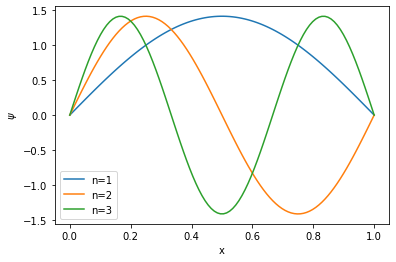

In [25]:
# Use the numpy and matplotlib libraries in this excercise
import numpy as np
import matplotlib.pyplot as plt

# Define a function that returns the energy for a given value of n
def energy(n):
    return np.pi**2*n**2/2.0

# Define a function that returns the particle in a box eigenfunction for a given value of n
# Use np.sqrt, np.sin, and np.pi
def eigenfunctions(x, n):
    return np.sqrt(2)*np.sin(n*x*np.pi)

# Plot the first three eigenstates in the same figure and label each of the plots
figure = plt.figure()
# Use 100 equally spaced points between 0 and 1
x = np.linspace(0, 1, 100)

# Write a python loop to call the eigenfunctions function three times for n=1,2,3
# Plot with the plt.plot function and add a label using the "label" keyword argument
for n in range(1, 4):
    plt.plot(x, eigenfunctions(x, n), label="n=%s" %n)

plt.xlabel("x")
plt.ylabel("$\psi$")
plt.legend()
plt.show()

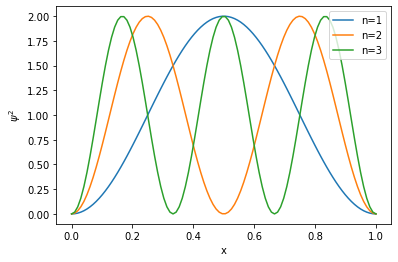

In [26]:
# Plot the probability amplitude for the first three eigenstates in the same figure
# and label each of the plots. Also write the axes labels.
# Because the particle in a box wavefunction is real, this is just psi*psi

figure = plt.figure()

# Write your answer
for n in range(1, 4):
    plt.plot(x, eigenfunctions(x, n)**2, label="n=%s" %n)

plt.xlabel("x")
plt.ylabel("$\psi^2$")
plt.legend()

plt.show()

### Verifying orthonormality

The eigenfunctions of the Hamiltonian are normalized and orthogonal ($\int_{-\infty}^{\infty} \psi_n^* \psi_m dx = \delta_{nm}$). Verify this below for the first three eigenstates using numerical integration.

In [27]:
# Use the scipy library to perform the integration
import scipy
import scipy.integrate

# Define a function that takes n and m values and return the product of two eigenfunction
# Call the eigenfunctions function defined above
def psi_product(x, n, m):
    return eigenfunctions(x, n)*eigenfunctions(x, m)

# Use the function scipy.integrate.quad to perform the integration
# You can use the following syntax to perform the numerical integration between 0 and 1 for n=2 and m=2
integral = scipy.integrate.quad(psi_product, 0, 1, args=(2, 2))[0]
##print("The integral of psi_%i^2 is" %2, integral)

# Verify that the first three eigenfunctions are normalized by numerical integration
# Use one for loop
for n in range(1,4):
    integral = scipy.integrate.quad(psi_product, 0, 1, args=(n, n))[0]
    print("The integral of Ψ_%i^2 is %.0f" %(n, integral))
# Verify that the first three eigenfunctions are orthogonal by numerical integration
# Use two for loops
print("\n")
for m in range(1,4):
    for n in range (1,4):
        if m==n:
            break
        integral = scipy.integrate.quad(psi_product, 0, 1, args=(n, m))[0]
        print("The integral of Ψ_%i*Ψ_%i is %.0f" %(n,m,abs(integral)))        
###
###

The integral of Ψ_1^2 is 1
The integral of Ψ_2^2 is 1
The integral of Ψ_3^2 is 1


The integral of Ψ_1*Ψ_2 is 0
The integral of Ψ_1*Ψ_3 is 0
The integral of Ψ_2*Ψ_3 is 0


### Calculating expectation values

We can caluclate the expectation value of an operator $\hat{o}$ using the formula: $\langle o \rangle = \int_{-\infty}^\infty \psi^*\hat{o}\psi dx$.

Show below by numerical integration that the average position of the particle is $1/2$ for the first three eigenstates

In [28]:
# Define a function that return psi_n*x*psi_n
# Call the eigenfunctions function defined above
def position_probability(x, n):
    return eigenfunctions(x, n)*x*eigenfunctions(x, n)

# Calculate the integral of the above function for n=1, 2, 3
for n in range(1,4):
    integral = scipy.integrate.quad(position_probability, 0, 1, args=(n))[0]
    print("The average position of the particle is %.2f" %(integral))

The average position of the particle is 0.50
The average position of the particle is 0.50
The average position of the particle is 0.50


Now calculate the average energy for the three eigenstates numerically.

In [29]:
# For the average energy we need to calculate the second derivative of the wavefunction
# A numerical derivative function is defined in scipy.misc.derivative
import scipy.misc

# Define a function that returns psi*(-1/2*d^2 psi/dx^2)
def energy_probability(x, n):
    # We can calculate the second derivative numerically using the following syntax
    psi_dprime = scipy.misc.derivative(eigenfunctions, x, dx=0.0001, args=(n,), n=2)
    
    # Return the above energy expression
    # Write your answer here
    return eigenfunctions(x, n)*-1/2*psi_dprime 

# Calculate the integral of the above function for n=1, 2, 3
for n in range(1,4):
    integral = scipy.integrate.quad(energy_probability, 0, 1, args=(n))[0]
    print("The average energy <E> is %.2f" %(integral))


The average energy <E> is 4.93
The average energy <E> is 19.74
The average energy <E> is 44.41


### Symbolic computations for the particle in a box

Now, let's verify these numerical approximations by comparing them with symbolic results obtained with Sympy

In [30]:
import sympy

# First define the symbols x, n, and m. Use correct assumptions for the parameters
x = sympy.symbols("x", real=True)
n, m = sympy.symbols("n, m", integer=True, positive=True)

# Define a variable psi that is equal to the particle in a box eigenfunctions
psi = sympy.sqrt(2)*sympy.sin(n*(sympy.pi*x))

# We can perform integration of psi^*psi for n=1 in sympy using the following syntax
#integral = sympy.Integral(psi.subs(n, 1).conjugate()*psi.subs(n, 1), (x, 0, 1))
#print("The integral of psi_%i^2 is" %1, integral.doit())
# or 
#integral = sympy.integrate(psi.subs(n, 1).conjugate()*psi.subs(n, 1), (x, 0, 1))
#print("The integral of psi_%i^2 is" %1, integral)

# Verify the normalization of the three first states by integration
for h in range(1,4):
    integral = sympy.Integral(psi.subs(n, h).conjugate()*psi.subs(n, h), (x, 0, 1))
    print("The integral of Ψ_%i^2 is" %h, integral.doit())
    
# Verify that the first three eigenfunctions are orthogonal
print('\n')
for i in range(1,4):
    for j in range(1,4):
        if i==j:
            break
        integral = sympy.Integral(psi.subs(n, i).conjugate()*psi.subs(n, j), (x, 0, 1))
        print("The integral of Ψ_%i*Ψ_%i is" %(i,j), integral.doit())

# Calculate the average position for the three first eigenstates
print("\n")
for i in range(1,4):
    integral = sympy.Integral(psi.subs(n, i).conjugate()*x*psi.subs(n, i), (x, 0, 1))
    print("The average position is", integral.doit())
    
# Calculate the average energy for the three first eigenstates
# For the energy, we need to take the second derivative of psi with respect to x.
# We can do this in sympy using the following syntax
# psi_dprime = psi.subs(n, 1).diff(x, 2)
psi_dprime = psi.diff(x, 2)
print('\n')
for i in range(1,4):
    integral = sympy.Integral(-1/2*psi.subs(n, i)*psi_dprime.subs(n, i), (x, 0, 1))
    print("The average energy <E> is %.2f" %(integral.doit()))
###

The integral of Ψ_1^2 is 1
The integral of Ψ_2^2 is 1
The integral of Ψ_3^2 is 1


The integral of Ψ_2*Ψ_1 is 0
The integral of Ψ_3*Ψ_1 is 0
The integral of Ψ_3*Ψ_2 is 0


The average position is 1/2
The average position is 1/2
The average position is 1/2


The average energy <E> is 4.93
The average energy <E> is 19.74
The average energy <E> is 44.41


### Applying the variational method

The variational method gives an upper bound for the energy. For *any* normalized trial wavefunction $\psi$,

$E_{gs} \le \int_\infty^\infty \psi^*\hat{H}\psi dx \equiv \langle E \rangle$.

We will try the two following unnormalized wavefunction for the particle in a box and estimate the average energy: $\psi(x) = x(1-x)$ and $\psi(x) = x^2(1-x)^2$.

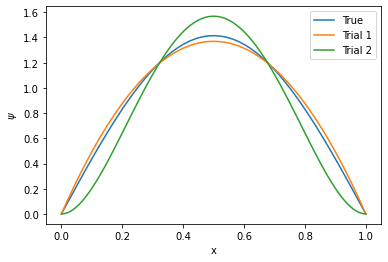

The average energy <E> of true Ψ is 4.93

The average energy <E> of Ψ_trial_1 is 5.00
And the difference is 0.07

The average energy <E> of Ψ_trial_2 is 6.00
And the difference is 1.07


In [31]:
# Use SymPy for this task
import sympy
import numpy as np
import matplotlib.pyplot as plt

# Define the symbol x
x = sympy.symbols("x", real=True)

# Define a variable psi_1 to be equal to the first trial function
# and normalize psi_1
psi_1 = x*(1-x)
normalization_factor = sympy.Integral(psi_1.conjugate()*psi_1, (x, 0, 1)).doit()
psi_1 = psi_1/sympy.sqrt(normalization_factor)

# Define a variable psi_2 to be equal to the second trial function
# and normalize psi_2
# Write your answer here
psi_2 = (x*(1-x))**2
normalization_factor = sympy.Integral(psi_2.conjugate()*psi_2, (x, 0, 1)).doit()
psi_2 = (x*(1-x))**2/sympy.sqrt(normalization_factor)

# Convert the two trial functions to python functions that accept numpy arrays
# Use the function sympy.lamdify
psi_1_f = sympy.lambdify(x, psi_1)
psi_2_f = sympy.lambdify(x, psi_2)
psi = sympy.sqrt(2)*sympy.sin((sympy.pi*x))
psi_f = sympy.lambdify(x, psi)
# Plot the two trial functions along with the true ground state defined in the eigenfunctions function above
x_values = np.linspace(0, 1, 100)
figure = plt.figure()

# Write your answer here
### Plot the true ground state in this line
plt.plot(x_values, psi_f(x_values), label="True")
plt.plot(x_values, psi_1_f(x_values), label="Trial 1")
plt.plot(x_values, psi_2_f(x_values), label="Trial 2")
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.legend()
plt.show()

# Calculate the average energies and errors for the two trial functions
# Print energy and error to the screen
# You can call your energy function defined above to obtain the true energy for n=1
psi_dprime = psi.diff(x, 2)
integral_1 = sympy.Integral(-1/2*psi*psi_dprime, (x, 0, 1))
print("The average energy <E> of true Ψ is %.2f\n" %integral_1)

psi_dprime = psi_1.diff(x, 2)
integral_2 = sympy.integrate(-1/2*psi_1*psi_dprime, (x, 0, 1))
print("The average energy <E> of Ψ_trial_1 is %.2f\nAnd the difference is %.2f\n" %(integral_2, (integral_2.doit()-integral_1.doit())))


psi_dprime = psi_2.diff(x, 2)
integral_3 = sympy.integrate(-1/2*psi_2*psi_dprime, (x, 0, 1))
print("The average energy <E> of Ψ_trial_2 is %.2f\nAnd the difference is %.2f" %(integral_3, (integral_3.doit()-integral_1.doit())))
###

We can see that the first trial function $\psi(x) = x(1-x)$ is better than the second trial function $\psi(x) = x^2(1-x)^2$. It looks more similar to the true ground state and the error in the energy is smaller.

We can also see that the two trial functions have opposite error trends relative to the true state. The first trial function slightly underestimate the probability of finding the particle in the center of the box and overestimate the probability away from the center. The second trial function has the opposite problem. 

Now we will try a **linear combination** of the two trial functions: $\psi(x) = x(1-x) + c x^2(1-x)^2$. We will *vary* the constant $c$ until we get the best wavefunction and energy.

In [32]:
# Use sympy for this task
import sympy
x, c = sympy.symbols("x, c", real=True)

# Define the variable psi that equals the linear combination of the trial function
psi = psi_1 + c * psi_2

# Now calculate the expectation value for the energy
average_energy = sympy.Integral(sympy.Rational(-1/2)*psi.conjugate()*psi.diff(x, 2), (x, 0, 1))
average_energy /= sympy.Integral(psi.conjugate()*psi, (x, 0, 1)).doit()

# print the expression for the average energy
average_energy.doit().simplify()

7*(6*c**2 + 2*sqrt(21)*c + 5)/(7*c**2 + 3*sqrt(21)*c + 7)

The above epxression gives the average energy of the trial function $\psi(x) = x(1-x) + c x^2(1-x)^2$ in terms of the constant $c$. To find the best energy and the best trial function, we need to minimize the energy expression with respect to the coefficient $c$.

In [33]:
# Minimize the energy expression using the scipy.optimize.minimize function
import scipy.optimize

# Define a function for the average energy in terms of the parameter c
def average_energy(c):
    # Return the expression that you found from above
    avgE = 6*c**2 + 2*np.sqrt(21)*c + 5
    avgE /= (c**2 + ((3*np.sqrt(21)*c)/7) + 1)
    return avgE
             
# Minimize the average energy with respect to the parameter c
minimization_result = scipy.optimize.minimize(average_energy, 0.5)
minimum_energy = minimization_result.fun
best_c = minimization_result.x[0]

print("The minimum energy is %.2f when c equals %.2f" %(minimum_energy, best_c))
print("The error is %.6f" %(minimum_energy-energy(1)))

The minimum energy is 4.93 when c equals 0.25
The error is 0.000073


Thus, by using a linear combination of the two trial functions and minimizing the constant $c$, we were able to find a more accurate wavefunction and a more accurate energy. 

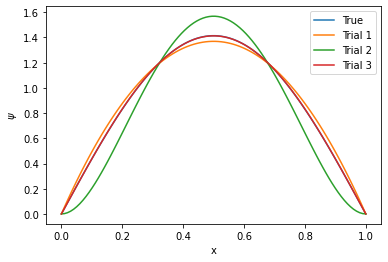

In [34]:
# Verify that the third trial function looks more similar to the true eigenstate than
# the previous two trial functions.

# Write the new trial function with sympy using the best value for c and normalize it
new_psi = psi.subs(c, best_c)
normalization_factor = sympy.Integral(new_psi.conjugate()*new_psi, (x, 0, 1)).doit()
new_psi /= sympy.sqrt(normalization_factor)

# Plot the three trial functions along with the true ground state
# Label each of the plots
x_values = np.linspace(0, 1, 100)
figure = plt.figure()

new_psi_f = sympy.lambdify(x, new_psi)

plt.plot(x_values, psi_f(x_values), label="True")
plt.plot(x_values, psi_1_f(x_values), label="Trial 1")
plt.plot(x_values, psi_2_f(x_values), label="Trial 2")
plt.plot(x_values, new_psi_f(x_values), label="Trial 3")
plt.xlabel("x")
plt.ylabel("$\psi$")
plt.legend()
plt.show()

## The Hydrogen Atom
The energy and orbitals of the hydrogen atom are found by solving the following Schrodinger's equation:

\begin{align}
-\frac{\hbar^2}{2\mu} \nabla^2 \psi -\frac{1}{4 \pi \epsilon_0} \frac{e^2}{r} \psi &= E \psi
\end{align}

The solution is found to be a product of two functions: radial and angular.

\begin{align}
\psi_{nlm}(r, \theta, \phi) = R_{nl}(r) Y_l^m(\theta, \phi),
\end{align}

$R_{nl}$ depends on an exponential factor $e^{-r}$ and a polynomial in $r$.

We will do three tasks here:
* Plot a few radial functions
* Calculate the average value of the position
* Apply the variational method for a trial wavefunction

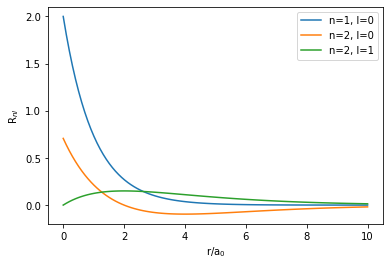

In [35]:
# plot the following three states for the radial function between r=0 and r=10:
# n = 1, l = 0
# n = 2, l = 0
# n = 2, l = 1

import sympy
import sympy.physics.hydrogen
import numpy as np
import matplotlib.pyplot as plt

# Store the values of the three radial functions in the following variables
r10 = []
r20 = []
r21 = []
r_values = np.linspace(0, 10, 100)

for r in r_values:
    r10.append(sympy.physics.hydrogen.R_nl(1, 0, r))
    r20.append(sympy.physics.hydrogen.R_nl(2, 0, r))
    r21.append(sympy.physics.hydrogen.R_nl(2, 1, r))

# Plot the radial functions and label each of the plots
plt.figure()

plt.plot(r_values, r10, label="n=1, l=0")
plt.plot(r_values, r20, label="n=2, l=0")
plt.plot(r_values, r21, label="n=2, l=1")


plt.xlabel("r/a$_0$")
plt.ylabel("R$_{nl}$")
plt.legend()
plt.show()

In [36]:
# Calculate the average value for r, <r>, in the ground state
# Remember that the integral over r in spherical coordinates involve the factor r^2 dr
# Define a symbol r and express the radial function in terms of the variable r

r = sympy.symbols("r", real=True, positive=True)
psi = sympy.physics.hydrogen.R_nl(1, 0, r)

# First verify that the R10 state is normalized
# Use sympy.oo to represent infinity 

integral = sympy.Integral(r**2*psi.conjugate()*psi, (r, 0, sympy.oo)).doit()

print("The integral of (rΨ)^2 = %i, hence R10 is normalized\n" %integral)


# # Calculate the average value of the position
average_value = sympy.Integral(r**3*psi.conjugate()*psi, (r, 0, sympy.oo)).doit()
print("The average value is", average_value, "a0")

The integral of (rΨ)^2 = 1, hence R10 is normalized

The average value is 3/2 a0


### The variational method for the hydrogen atom
Again, the variational principle can be expressed as follows:
$E_{gs} \le \int_\infty^\infty \psi^*\hat{H}\psi dx \equiv \langle E \rangle$. For the hydrogen atom, the exact ground state wavefunction and energy are known. In atomic units, they are given by:
\begin{align}
\psi_{100} &= \frac{1}{\sqrt{\pi}} e^{-r} \\
E_{gs} &= -\frac{1}{2}
\end{align}

Suppose instead that we use the following Gaussian trial function $\phi = e^{-\alpha r^2}$. We will first calculate the expectation value for the energy using this approximate wavefunction. Then, we will minimize the energy with respect to the variational parameter $\alpha$.

In [37]:
# Use sympy for this task
import sympy

# Define the r and alpha symbols. alpha is a positive real number
r, alpha  = sympy.symbols("r, alpha", real=True, positive=True)

# Define the trial wavefunction. Use sympy.exp for the exponential
psi_1 = sympy.exp(-alpha*r**2)

# Normalize the trial wavefunction
# Calculate the expectation value for the energy. The energy consists of kinetic and potential terms
# Remember how to express the Laplacian in spherical coordinates
# The angular part will give a factor of 4*pi

normalization_factor = sympy.Integral(4*sympy.pi*psi_1.conjugate()*psi_1*r**2, (r, 0, sympy.oo)).doit()
psi_1 /= sympy.sqrt(normalization_factor)
HS = lambda psi : -1/2*(1/r**2)*sympy.diff(r**2*sympy.diff(psi, r), r) - psi/r
Expp = sympy.Integral(psi_1.conjugate()*HS(psi_1)*r**2*4*sympy.pi,(r, 0, sympy.oo)).doit().simplify()
Expp


-2*sqrt(2)*sqrt(alpha)/sqrt(pi) + 1.5*alpha

We calculated an expression for the energy of the hydrogen atom in terms of $\alpha$. Now, we need to find $\alpha$ that minimizes energy. 

In [38]:
# Use the numpy and scipy libraries
import numpy as np
import scipy
import scipy.optimize

# Define a function that returns the energy in terms of alpha
average_energy = sympy.lambdify(alpha, Expp)
    

# Optimize the energy using the function scipy.optimize.minimize
minimization_result = scipy.optimize.minimize(average_energy, 0.5)
minimum_energy = minimization_result.fun
best_alpha = minimization_result.x[0]

# print the minimum energy and the absolute error.
print("The minimum average energy is %.2f when alpha is %.2f" %(minimum_energy, best_alpha))
print("The absolute error is %.3f" %abs(minimum_energy + 1/2))

The minimum average energy is -0.42 when alpha is 0.28
The absolute error is 0.076


## Conclusion
Summarize what you learned in this lab in a few points:
* Python is a good language with good libraries that will help us to compute some scientific values.
* We can solve the hydrogen atom exactly using schrodinger's equation.
* The variational method with the linear combination of the trial functions is a good approach to obtain a good approximation of the exact Ψ function.

### Ibraheem Al-Yousef, Lab 1